This is a self-sufficient Jupyter notebook aiming in investigating whether a truncated power-law distribution $D(W_1)$ of relaxation rates $W_1$ can sufficiently approximate the $D(W_1)$ for the glassy case of NMR magnetization relaxation as indicated by real NMR data. We assume then a test $D(W_1)$ of a power law form: $D(W_1) \equiv A \, W_1^{-\theta}$ valid only for a range: $W_1 \in (W_1^{\min}, W_1^{\max})$, $D(W_1) = 0$ for points outside this range, and with $A$ the appropriate normalization factor and $\theta$ the critical exponent.

The notebook consists of two sections. The first section allows the user to input estimates for the parameters $\theta$, $W_1^{\min}$, $W_1^{\max}$ and temperature $T$ (critical temperature $T_c = 25 K$). The resulting $D(W_1)$ distribution is appropriately integrated (for a specific recovery function) to yield numerical magnetization recovery values for specific recovery times $t_i$ from NMR measurements and then a comparison is made with the actual NMR magnetization recovery data using a simple RSS test.

The second section attempts to optimize the $\theta$ and $W_1^{\min}$ estimates (only) by investigating a range of nearby values $\theta \pm \Delta\theta$ and $W_1^{\min} \pm \Delta W_1^{\min}$, with $\Delta\theta$ and $\Delta W_1^{\min}$ defined by the user, searching for the optimal $(\theta, W_1^{\min})$ pair of values that minimizes the RSS value. Using then this optimal $(\theta, W_1^{\min})$ pair the corresponding $D(W_1)$ is constructed and its resulting numerical magnetization recovery values are plotted against real data.

### Open In Colab Badge
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Stylianos29/NMR-Nematic-Scaling/blob/main/Power_Law_W1_Dist_Test.ipynb)

# SECTION I

In [14]:
%matplotlib inline

# Dependencies
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Here the user can input values for the temperature (critical temperature at $T_c = 25 K$), the exponent of the power law form, and the range $W_1 \in (W_1^{\min}, W_1^{\max})$:

The integral of the distribution is = 0.9999999999999999


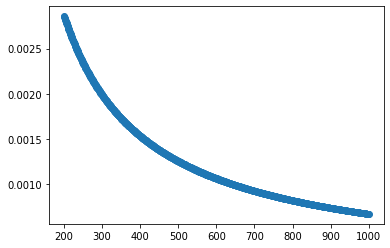

In [15]:
# Input: Choose an exponent value and a lower bound for the distribution
temperature_value = 25
critical_exponent = 0.9
W1min = 200; #(1/s)
W1max = 1000 # No need to change it, power law distrbution values fall off very quickly

# Test W1 distribution symbolic definition
def W1_distribution(W1, factor, exponent):
    return factor*W1**(-exponent)

# Number of bins for the W1 distribution histogram
number_of_bins_W1dist = 1000 # FYI, 100 bins are already quite many

# Constructing the distribution histogram as a list of 2 numpy arrays
def distribution_histogram(func, number_of_histogram_bins, exponent_parameter, lower_bound, upper_bound):
    delta_dist = (upper_bound - lower_bound)/number_of_histogram_bins
    histogram_bins = np.array( [ ( lower_bound + delta_dist * (j + 1/2) ) for j in range(number_of_histogram_bins) ] )
    distribution_values = func(histogram_bins, 1, exponent_parameter)
    integral = np.sum(  distribution_values * delta_dist )
    distribution_values = distribution_values/integral
    return [histogram_bins, distribution_values]

W1_distribution_histogram = distribution_histogram(W1_distribution, number_of_bins_W1dist, critical_exponent, W1min, W1max)

# Normalization check
print('The integral of the distribution is =',np.sum(W1_distribution_histogram[1]*((W1max - W1min)/number_of_bins_W1dist)))

# # Plotting the normalized distribution

plt.scatter(W1_distribution_histogram[0], W1_distribution_histogram[1])
plt.show()

In [16]:
# Real data import -- no input necessary 
import pandas as pd
import pprint

#Passing the content of the .csv file to a Pandas DataFrame
#df = pd.read_csv(r'D:\Dropbox (Personal)\Purdue University\2020_C (Fall Term)\PHYS590 (NMR)\Python Programs\NMR_Nematic_Scaling\NMR_measurements\Raw Recovery Data x=0.05898 11.7T.csv')
df = pd.read_csv(r'/content/Raw Recovery Data x=0.05898 11.7T.csv')

# #Importing the content of the Magnetization_recovery_dict dictionary to a text file
Magnetization_recovery_dict = {4.5: ['twait_Co5898_4p5K_90deg_T1', 'r_Co5898_4p5K_90deg_T1'], 5.25: ['twait_Co5898_5p25K_90deg_T1', 'r_Co5898_5p25K_90deg_T1'], 6.0: ['twait_Co5898_6K_90deg_T1', 'r_Co5898_6K_90deg_T1'], 7.0: ['twait_Co5898_7K_90deg_T1', 'r_Co5898_7K_90deg_T1'], 8.0: ['twait_Co5898_8K_90deg_T1', 'r_Co5898_8K_90deg_T1'], 9.0: ['twait_Co5898_9K_90deg_T1', 'r_Co5898_9K_90deg_T1'], 10.0: ['twait_Co5898_10K_90deg_T1', 'r_Co5898_10K_90deg_T1'], 11.0: ['twait_Co5898_11K_90deg_T1', 'r_Co5898_11K_90deg_T1'], 12.0: ['twait_Co5898_12K_90deg_T1', 'r_Co5898_12K_90deg_T1'], 13.0: ['twait_Co5898_13K_90deg_T1', 'r_Co5898_13K_90deg_T1'], 15.0: ['twait_Co5898_15K_90deg_T1', 'r_Co5898_15K_90deg_T1'], 16.0: ['twait_Co5898_16K_90deg_T1', 'r_Co5898_16K_90deg_T1'], 17.0: ['twait_Co5898_17K_90deg_T1', 'r_Co5898_17K_90deg_T1'], 18.0: ['twait_Co5898_18K_90deg_T1', 'r_Co5898_18K_90deg_T1'], 19.0: ['twait_Co5898_19K_90deg_T1', 'r_Co5898_19K_90deg_T1'], 20.0: ['twait_Co5898_20K_90deg_T1', 'r_Co5898_20K_90deg_T1'], 21.0: ['twait_Co5898_21K_90deg_T1', 'r_Co5898_21K_90deg_T1'], 22.0: ['twait_Co5898_22K_90deg_T1', 'r_Co5898_22K_90deg_T1'], 23.0: ['twait_Co5898_23K_90deg_T1', 'r_Co5898_23K_90deg_T1'], 24.0: ['twait_Co5898_24K_90deg_T1', 'r_Co5898_24K_90deg_T1'], 25.0: ['twait_Co5898_25K_90deg_T1', 'r_Co5898_25K_90deg_T1'], 26.0: ['twait_Co5898_26K_90deg_T1', 'r_Co5898_26K_90deg_T1'], 27.0: ['twait_Co5898_27K_90deg_T1', 'r_Co5898_27K_90deg_T1'], 28.0: ['twait_Co5898_28K_90deg_T1', 'r_Co5898_28K_90deg_T1'], 29.0: ['twait_Co5898_29K_90deg_T1', 'r_Co5898_29K_90deg_T1'], 30.0: ['twait_Co5898_30K_90deg_T1', 'r_Co5898_30K_90deg_T1'], 32.5: ['twait_Co5898_32p5K_90deg_T1', 'r_Co5898_32p5K_90deg_T1'], 35.0: ['twait_Co5898_35K_90deg_T1', 'r_Co5898_35K_90deg_T1'], 40.0: ['twait_Co5898_40K_90deg_T1', 'r_Co5898_40K_90deg_T1'], 45.0: ['twait_Co5898_45K_90deg_T1', 'r_Co5898_45K_90deg_T1'], 50.0: ['twait_Co5898_50K_90deg_T1', 'r_Co5898_50K_90deg_T1'], 57.5: ['twait_Co5898_57p5K_90deg_T1', 'r_Co5898_57p5K_90deg_T1'], 65.0: ['twait_Co5898_65K_90deg_T1', 'r_Co5898_65K_90deg_T1'], 75.0: ['twait_Co5898_75K_90deg_T1', 'r_Co5898_75K_90deg_T1'], 85.0: ['twait_Co5898_85K_90deg_T1', 'r_Co5898_85K_90deg_T1'], 100.0: ['twait_Co5898_100K_90deg_T1', 'r_Co5898_100K_90deg_T1'], 150.0: ['twait_Co5898_150K_90deg_T1', 'r_Co5898_150K_90deg_T1'], 200.0: ['twait_Co5898_200K_90deg_T1', 'r_Co5898_200K_90deg_T1'], 250.0: ['twait_Co5898_250K_90deg_T1', 'r_Co5898_250K_90deg_T1'], 300.0: ['twait_Co5898_300K_90deg_T1', 'r_Co5898_300K_90deg_T1']}
# pprint.pprint(Magnetization_recovery_dict)

temperature_value = float(temperature_value)
# for temperature_value in Magnetization_recovery_dict.keys():
Recovery_times = np.array(df[Magnetization_recovery_dict[temperature_value][0]])
Recovery_times = Recovery_times[np.logical_not(np.isnan( Recovery_times ))]
Magnetization_curve = np.array(df[Magnetization_recovery_dict[temperature_value][1]])
Magnetization_curve = Magnetization_curve[np.logical_not(np.isnan( Magnetization_curve ))]

#Making sure that all time recovery values are in ascenting order
array_indices = Recovery_times.argsort()
Recovery_times = Recovery_times[array_indices[::1]]
Magnetization_curve = Magnetization_curve[array_indices[::1]]

#Normalized data
Magnetization_curve = ( Magnetization_curve - min(Magnetization_curve) ) / ( max(Magnetization_curve) - min(Magnetization_curve) )

The calculation of numerical magnetization recovery values is performed for a specific ($I = 3/2$) recovery function.

In [17]:
# No input necessary
# Magnetization recovery function
def Recovery_function(x):
    return 1 - (9.0/10.0) * np.exp(-6*x)- (1.0/10.0) * np.exp(-x)

# Magnetization integral definition
def magnetization_integral(distribution_array, time_variable, lower_bound, upper_bound):
    number_of_bins = len(distribution_array)
    delta_dist = (upper_bound - lower_bound)/number_of_bins
    delta_area = np.array( [ (distribution_array[i] * Recovery_function( ( lower_bound + delta_dist*(i+1/2) ) * time_variable ) * delta_dist) for i in range(number_of_bins) ] )
    return np.sum(delta_area)

Magnetization_curve_numerical = np.array( [ (magnetization_integral( W1_distribution_histogram[1], experimental_time, W1min, W1max)) for experimental_time in Recovery_times ] )
RSS = np.sum( (Magnetization_curve_numerical - Magnetization_curve)**2 )

Next follows the plot of the numerically calculated values of the magnetization recovery against for the test distribution $D(W_1)$ against real data for the choose temperature value.

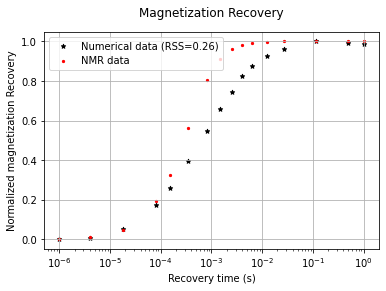

In [18]:
fig, ax = plt.subplots()

ax.scatter(Recovery_times, Magnetization_curve, s=20, color='black', marker="*")
ax.scatter(Recovery_times, Magnetization_curve_numerical, s=20, color='red', marker=".")

ax.grid()
ax.set_xscale('log')

ax.set_title('Magnetization Recovery', pad=15)
ax.set(xlabel='Recovery time (s)', ylabel='Normalized magnetization Recovery')

ax.legend(['Numerical data (RSS={:.2f})'.format(RSS), 'NMR data'], loc='upper left')
plt.show()

# SECTION II

Next the user can choose the range of investigated values for the $\theta$ and $W_1^{\min}$ parameters.

In [19]:
#input
N = 10
W1min_range = 250
critical_exponent_range = 0.8

# Construct and initialize the NxN RSS array
RSS_array = np.zeros((N,N))
# Construct two arrays with the W1min and critical exponent values to be investigated
#make sure that the invastigated ranges starts above W1min = 0
W1_range_min = W1min - W1min_range/2
if (W1min - W1min_range/2)<0:
    W1_range_min = 0
W1_range_array = np.array( [ ( W1_range_min+(W1min_range/N)*j ) for j in range(N) ] )
#make sure that the invastigated ranges starts above critical_exponent = 0
critical_exponent_min = critical_exponent - critical_exponent_range/2
if (critical_exponent - critical_exponent_range/2)<0:
    critical_exponent_min = 0
critical_exponent_array = np.array( [ ( critical_exponent_min+(critical_exponent_range/N)*j ) for j in range(N) ] )

# Calculating the RSS array values
for i in range(N):
    critical_exponent = critical_exponent_array[i]
    for j in range(N):
        W1min = W1_range_array[j]
        W1_distribution_histogram = distribution_histogram(W1_distribution, number_of_bins_W1dist, critical_exponent, W1min, W1max)
        Magnetization_curve_numerical = np.array( [ ( magnetization_integral(W1_distribution_histogram[1], experimental_time, W1min, W1max) ) for experimental_time in Recovery_times ] )
        RSS_array[i][j] = np.sum( (Magnetization_curve_numerical - Magnetization_curve)**2 )

A heatmap then indicates the values of RSS for various $(\theta, W_1^{\min})$ pairs:

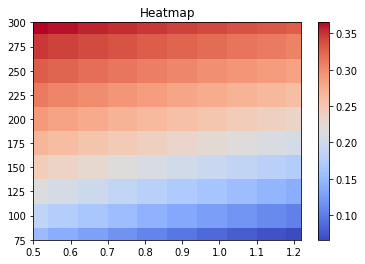

In [20]:
# Plotting the RSS heatmap
b, a = np.meshgrid(W1_range_array, critical_exponent_array)

c = RSS_array
# c = c[:-1, :-1]
l_a = a.min()
r_a = a.max()
l_b = b.min()
r_b = b.max()
l_c, r_c  = np.amin(c), np.max(c)

figure, axes = plt.subplots()

c = axes.pcolormesh(a, b, c, cmap='coolwarm', vmin=l_c, vmax=r_c, shading='auto')
axes.set_title('Heatmap')
axes.axis([l_a, r_a, l_b, r_b])
figure.colorbar(c)

plt.show()

Finally the plot of the numerically calculated values of the magnetization recovery for the distribution $D(W_1)$ of the optimal $(\theta, W_1^{\min})$ pair against real data (for the chosen temperature value) follows:

Optimal W1min value: 75.0 and critical exponent value: 1.22


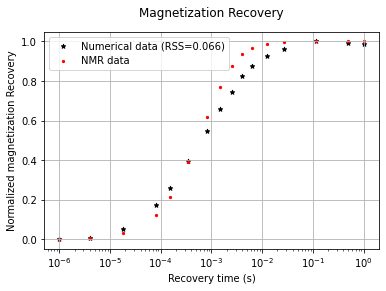

In [21]:
# Plot the numerical sets with the lowest RSS
RSS_minimum = np.array( np.where(RSS_array == np.amin(RSS_array) ) )
RSS = RSS_array[ RSS_minimum[0][0] ][ RSS_minimum[1][0] ]
W1min = W1_range_array[ RSS_minimum[1][0] ]
critical_exponent = critical_exponent_array[ RSS_minimum[0][0] ]

print("Optimal W1min value: {:.1f}".format(W1min)+" and critical exponent value: {:.2f}".format(critical_exponent))

W1_distribution_histogram = distribution_histogram(W1_distribution, number_of_bins_W1dist, critical_exponent, W1min, W1max)
Magnetization_curve_numerical = np.array( [ ( magnetization_integral(W1_distribution_histogram[1], experimental_time, W1min, W1max) ) for experimental_time in Recovery_times ] )

fig, ax = plt.subplots()

ax.scatter(Recovery_times, Magnetization_curve, s=20, color='black', marker="*")
ax.scatter(Recovery_times, Magnetization_curve_numerical, s=20, color='red', marker=".")

ax.grid()
ax.set_xscale('log')

ax.set_title('Magnetization Recovery', pad=15)
ax.set(xlabel='Recovery time (s)', ylabel='Normalized magnetization Recovery')

ax.legend(['Numerical data (RSS={:.3f})'.format(RSS), 'NMR data'], loc='upper left')
plt.show()